In [2]:
import pandas as panda
pdf=panda.read_csv("c:/work/statis/air-crash/aircrashes.csv")

In [4]:
print(pdf.head())

         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN

In [5]:
sample=list(pdf['Aboard'].dropna().astype(int))

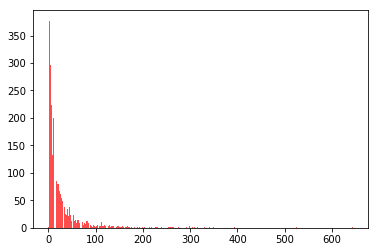

In [6]:
#print(sample)
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sea

n, bins, patches = plot.hist(x=sample, bins=644, color='red',alpha=0.7, rwidth=0.85)
plot.show()



In [7]:
# print(sample)
series=panda.DataFrame({'Aboard':sample})
series['Aboard'].describe()


count    5246.000000
mean       27.554518
std        43.076711
min         0.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       644.000000
Name: Aboard, dtype: float64

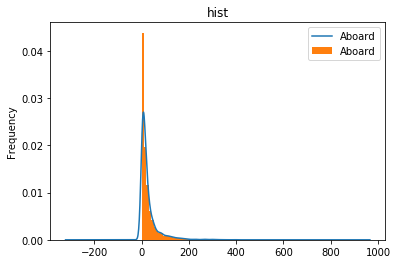

In [8]:
# print(series)
fig,ax=plot.subplots()
series.plot.kde(ax=ax,legend="False", title="hist")
series.plot.hist(density="True", ax=ax, bins=64)
# commutes = panda.Series(np.random.normal(27,60) ** 1.5)
#commutes.plot.hist(grid=True, bins=644, color='#607c8e')

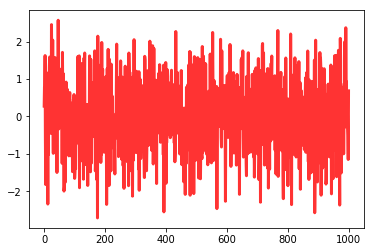

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
dist = stats.norm()
samp = dist.rvs(size=1000)
x = np.linspace(start=stats.norm.ppf(0.001),stop=stats.norm.ppf(0.999), num=6440)
# gkde = stats.gaussian_kde(dataset=samp)
fig, ax = plt.subplots()
ax.plot( samp, linestyle='solid', c='red', lw=3,alpha=0.8, label='Analytical (True) PDF')
# ax.plot(sample, gkde.evaluate(sample), linestyle='dashed', c='black', lw=2,label='PDF Estimated via KDE')

TypeError: unhashable type: 'slice'

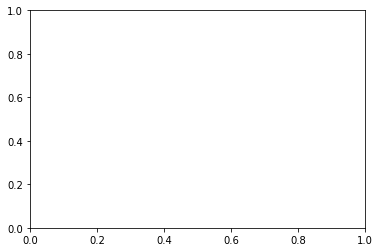

In [25]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(series)
log_dens=kde.score_samples(series)
fig, ax = plt.subplots()
ax.plot(series[:, 0], np.exp(log_dens), '-',label="kernel = '{0}'".format(kernel))
plt.show()


# score_samples returns the log of the probability density
x_d = np.linspace(start=stats.norm.ppf(0.001),stop=stats.norm.ppf(0.999), num=6440)
# logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)